# Environment Setup:
Before using this library, please ensure that you have the necessary packages and their corresponding versions.

Please refer to the [README.md](https://github.com/liuzy0708/Online-Learning-Framework?tab=readme-ov-file#environment-setup) for details.


In [1]:
from io import StringIO
from contextlib import redirect_stderr

with redirect_stderr(StringIO()):
    from tqdm.auto import tqdm
from Tools.OL import *
from Tools.ONE_STEP import *
from Tools.TWO_STEP_CHUNK import *
from Tools.TWO_STEP_INSTANCE import *

# Visualization:
Do you want to visualize the results? (Y/N)

If yes, then:
Do you want to generate the confusion matrix? (Y/N)

If needed, the results will also be saved in a PDF document in the Results folder.

In [2]:
show_plot = 'Y'
need_matrix = 'Y'

# Settings:
## There are four types of framework choices:
1. OL: Online learning, processing data one sample at a time.
2. ONE-STEP: Uses the classifiers in the OAL_classifier folder to complete model training and online learning in a single phase.
3. TWO-STEP-CHUNK: Uses the classifiers in the classifier folder to complete model training and online learning in two phases, while also supporting batch processing.
4. TWO-STEP-INSTANCE: Uses the classifiers in the classifier folder to complete model training and online learning in two steps, supporting only processing data one sample at a time.



Please select the **number** corresponding to the framework.

For example: entering 1 means selecting OL.

## Then, please input your experiment parameters below:
Include max_samples, n_round, n_pt, dataset_name.

For "dataset_name", You can choose **one** of the following.

``` python
['Jiaolong', 'Waveform', 'SEA', 'Hyperplane' or './datasets/' + name + '.csv']
```



In [3]:
framework = 1
max_samples = 400         #The range of tested stream
n_round = 3                 #Number of run round
n_pt = 100                  #Number of train samples
dataset_name = "SEA"

# Next:
Based on your framework, enter the models and parameters you need.

(You can replace the content with what you want to test)


1. If you choose "OL", valid models are:
``` python
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS', 'MLP_OGD', 'MLP_OMD']
```

2. If you choose "ONE-STEP", valid models are:
``` python
['ROALE_DI', 'OALE']
```

3. If you choose "TWO-STEP-CHUNK", valid models and strategies are:
``` python
models:
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS']
```
``` python
strategies:
['DMI_DD']
```

4. If you choose "TWO-STEP-INSTANCE", valid models and strategies are:
``` python
models:
['ARF', 'LB', 'OB', 'OBADWIN', 'DWM', 'OOB', 'SRP', 'AdaC2', 'QRBLS', 'BLS', 'OSSBLS', 'ISSBLS', 'SOSELM', 'NB', 'DES', 'DES_5', 'ACDWM', 'OLI2DS']
```
``` python
strategies:
['DSA_AI', 'Supervised', 'MTSGQS', 'US_fix', 'US_var', 'CogDQS', 'RS', 'DMI_DD']
```






In [4]:
logger.info("--------------------------------------------------------------------------------------------------")
if framework == 1:                      #"OL"
    clf_name_list = "ISSBLS"

    experiment = OL(max_samples=max_samples, n_round=n_round, n_pt=n_pt, dataset_name=dataset_name,
                    clf_name_list=clf_name_list)

elif framework == 2:                        #"ONE-STEP"
    method_name_list = "OALE,ROALE_DI"      #Only these two are supported.

    experiment = One_Step(max_samples=max_samples, n_round=n_round, n_pt=n_pt, dataset_name=dataset_name, method_name_list=method_name_list)

elif framework == 3:                    #"TWO-STEP-CHUNK"
    n_ratio_max = 0.30                  #Annotation ratio
    chunk_size = 20
    clf_name_list = "MLP_OGD"
    str_name_list = "DMI_DD"            #only support DMI_DD

    experiment = Two_Step_Chunk(max_samples=max_samples, n_round=n_round, n_pt=n_pt,n_ratio_max=n_ratio_max, chunk_size=chunk_size, dataset_name=dataset_name, clf_name_list=clf_name_list, str_name_list=str_name_list)

elif framework == 4:                #"TWO-STEP-INSTANCE"
    clf_name_list = "BLS,DWM"
    str_name_list = "RS"

    experiment = Two_Step_Instance(max_samples=max_samples, n_round=n_round, n_pt=n_pt,dataset_name=dataset_name, clf_name_list=clf_name_list, str_name_list=str_name_list)

else:
    raise ValueError("Invalid framework")

# Run:
The predicted results will be saved in CSV format in the Result folder.

If you choose visualization, the visualization results will be displayed here and all plotted results will be saved too.

The result includes the GIF form of Accuracy and F1, and the confusion matrix.

method:ISSBLS
round: 1
round: 2
round: 3

Accuracy ISSBLS: 0.955 ± 0.002
macro-F1 ISSBLS: 0.947 ± 0.002
Average Time ISSBLS: 0.3928 s

Saving results to: C:\Users\Alpha\PycharmProjects\Awesome_OL\Results\Results_SEA_OL_100_1_400
[1/1] Processing ISSBLS...


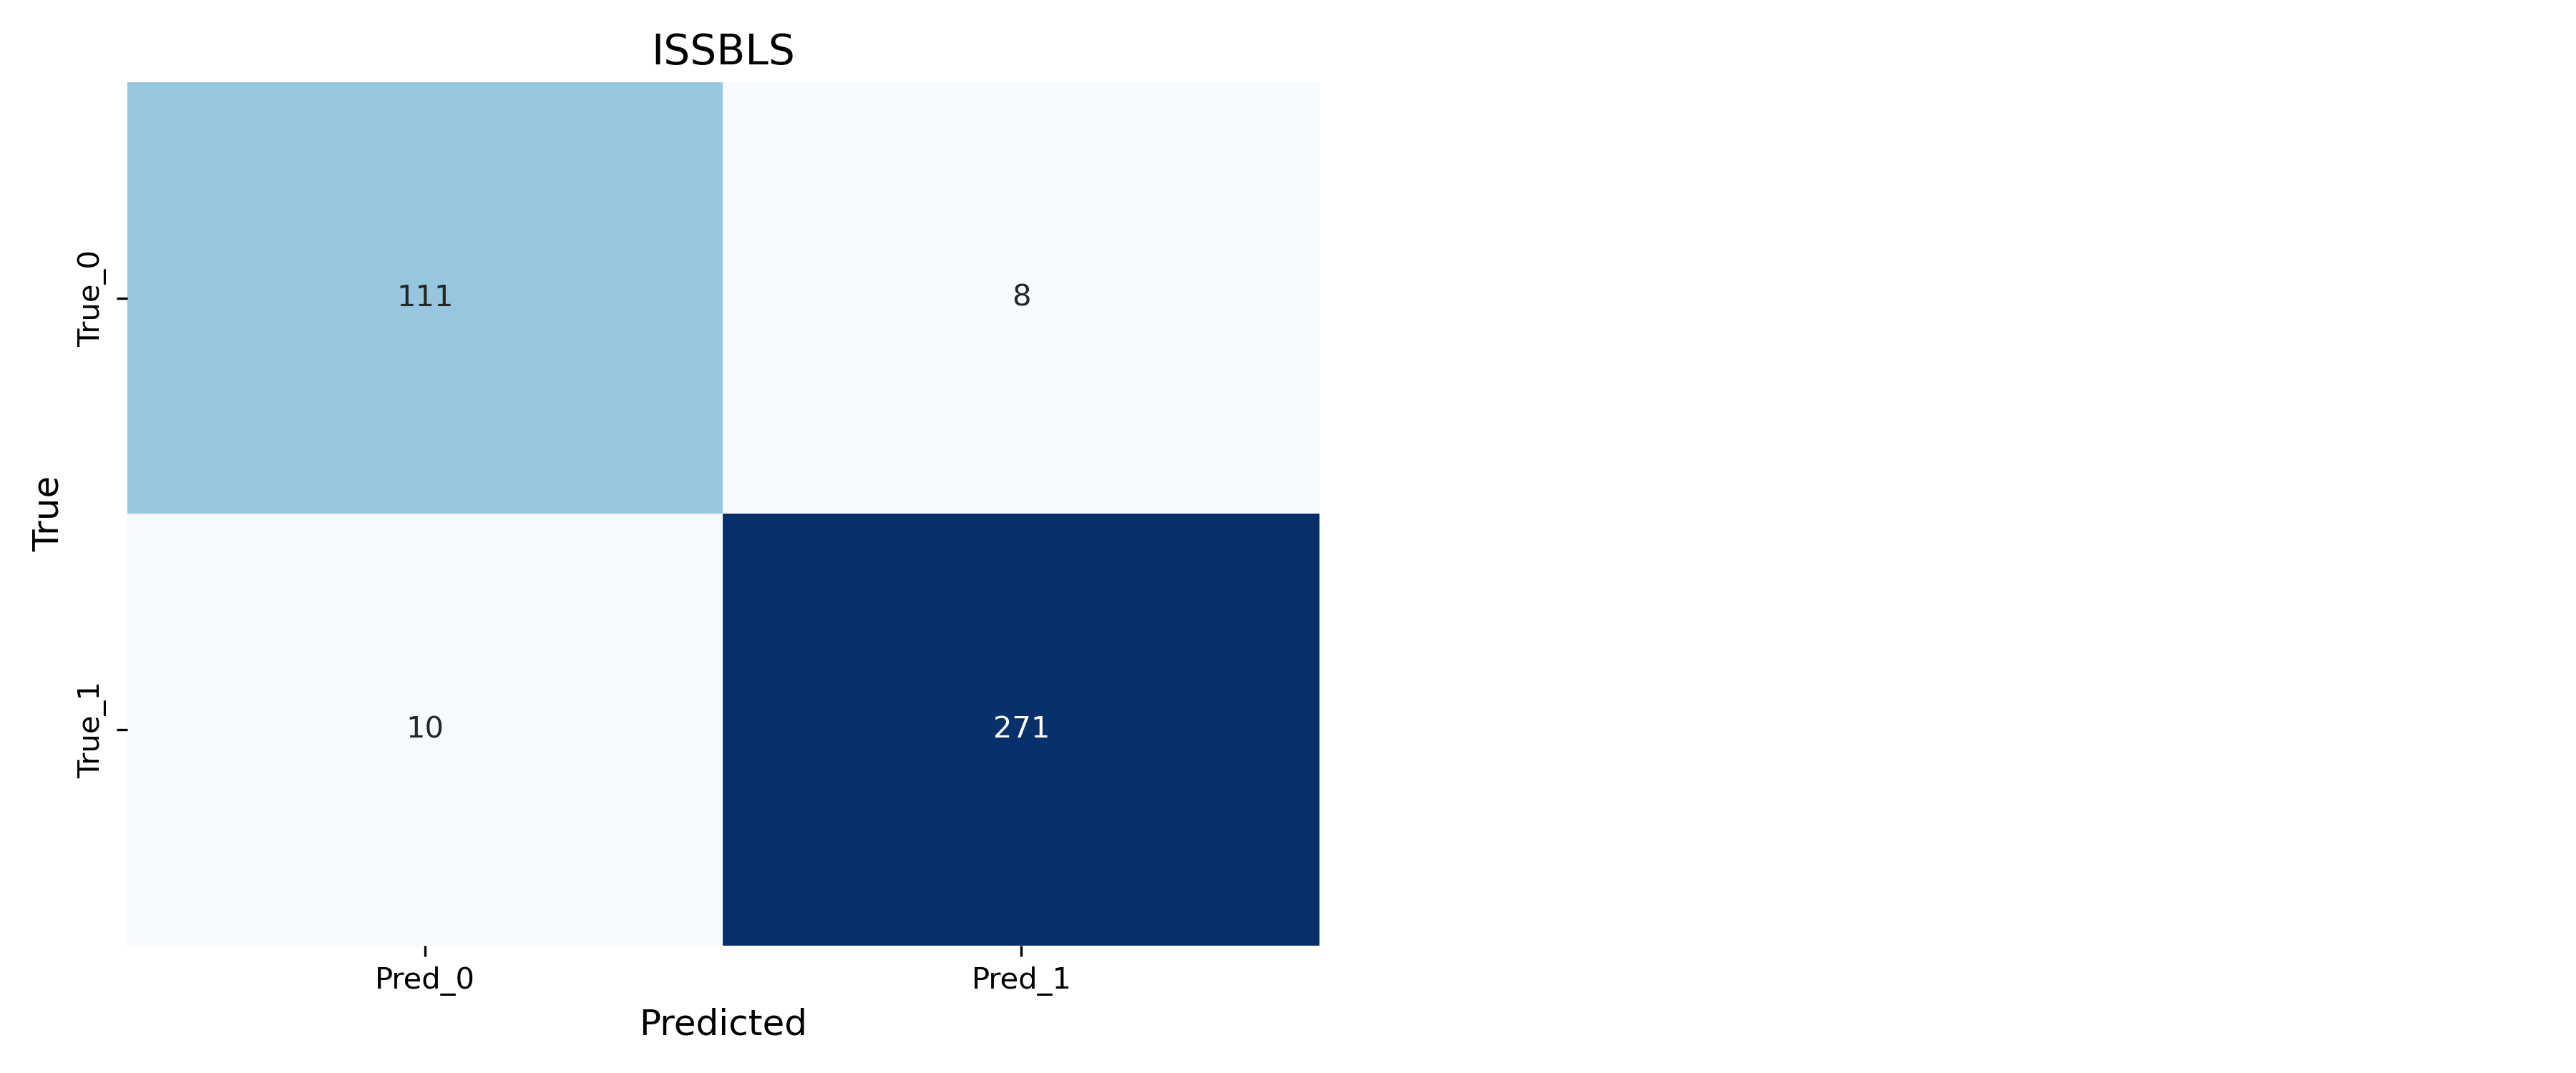

Saved static plot to: Results_static_SEA_all_models.png


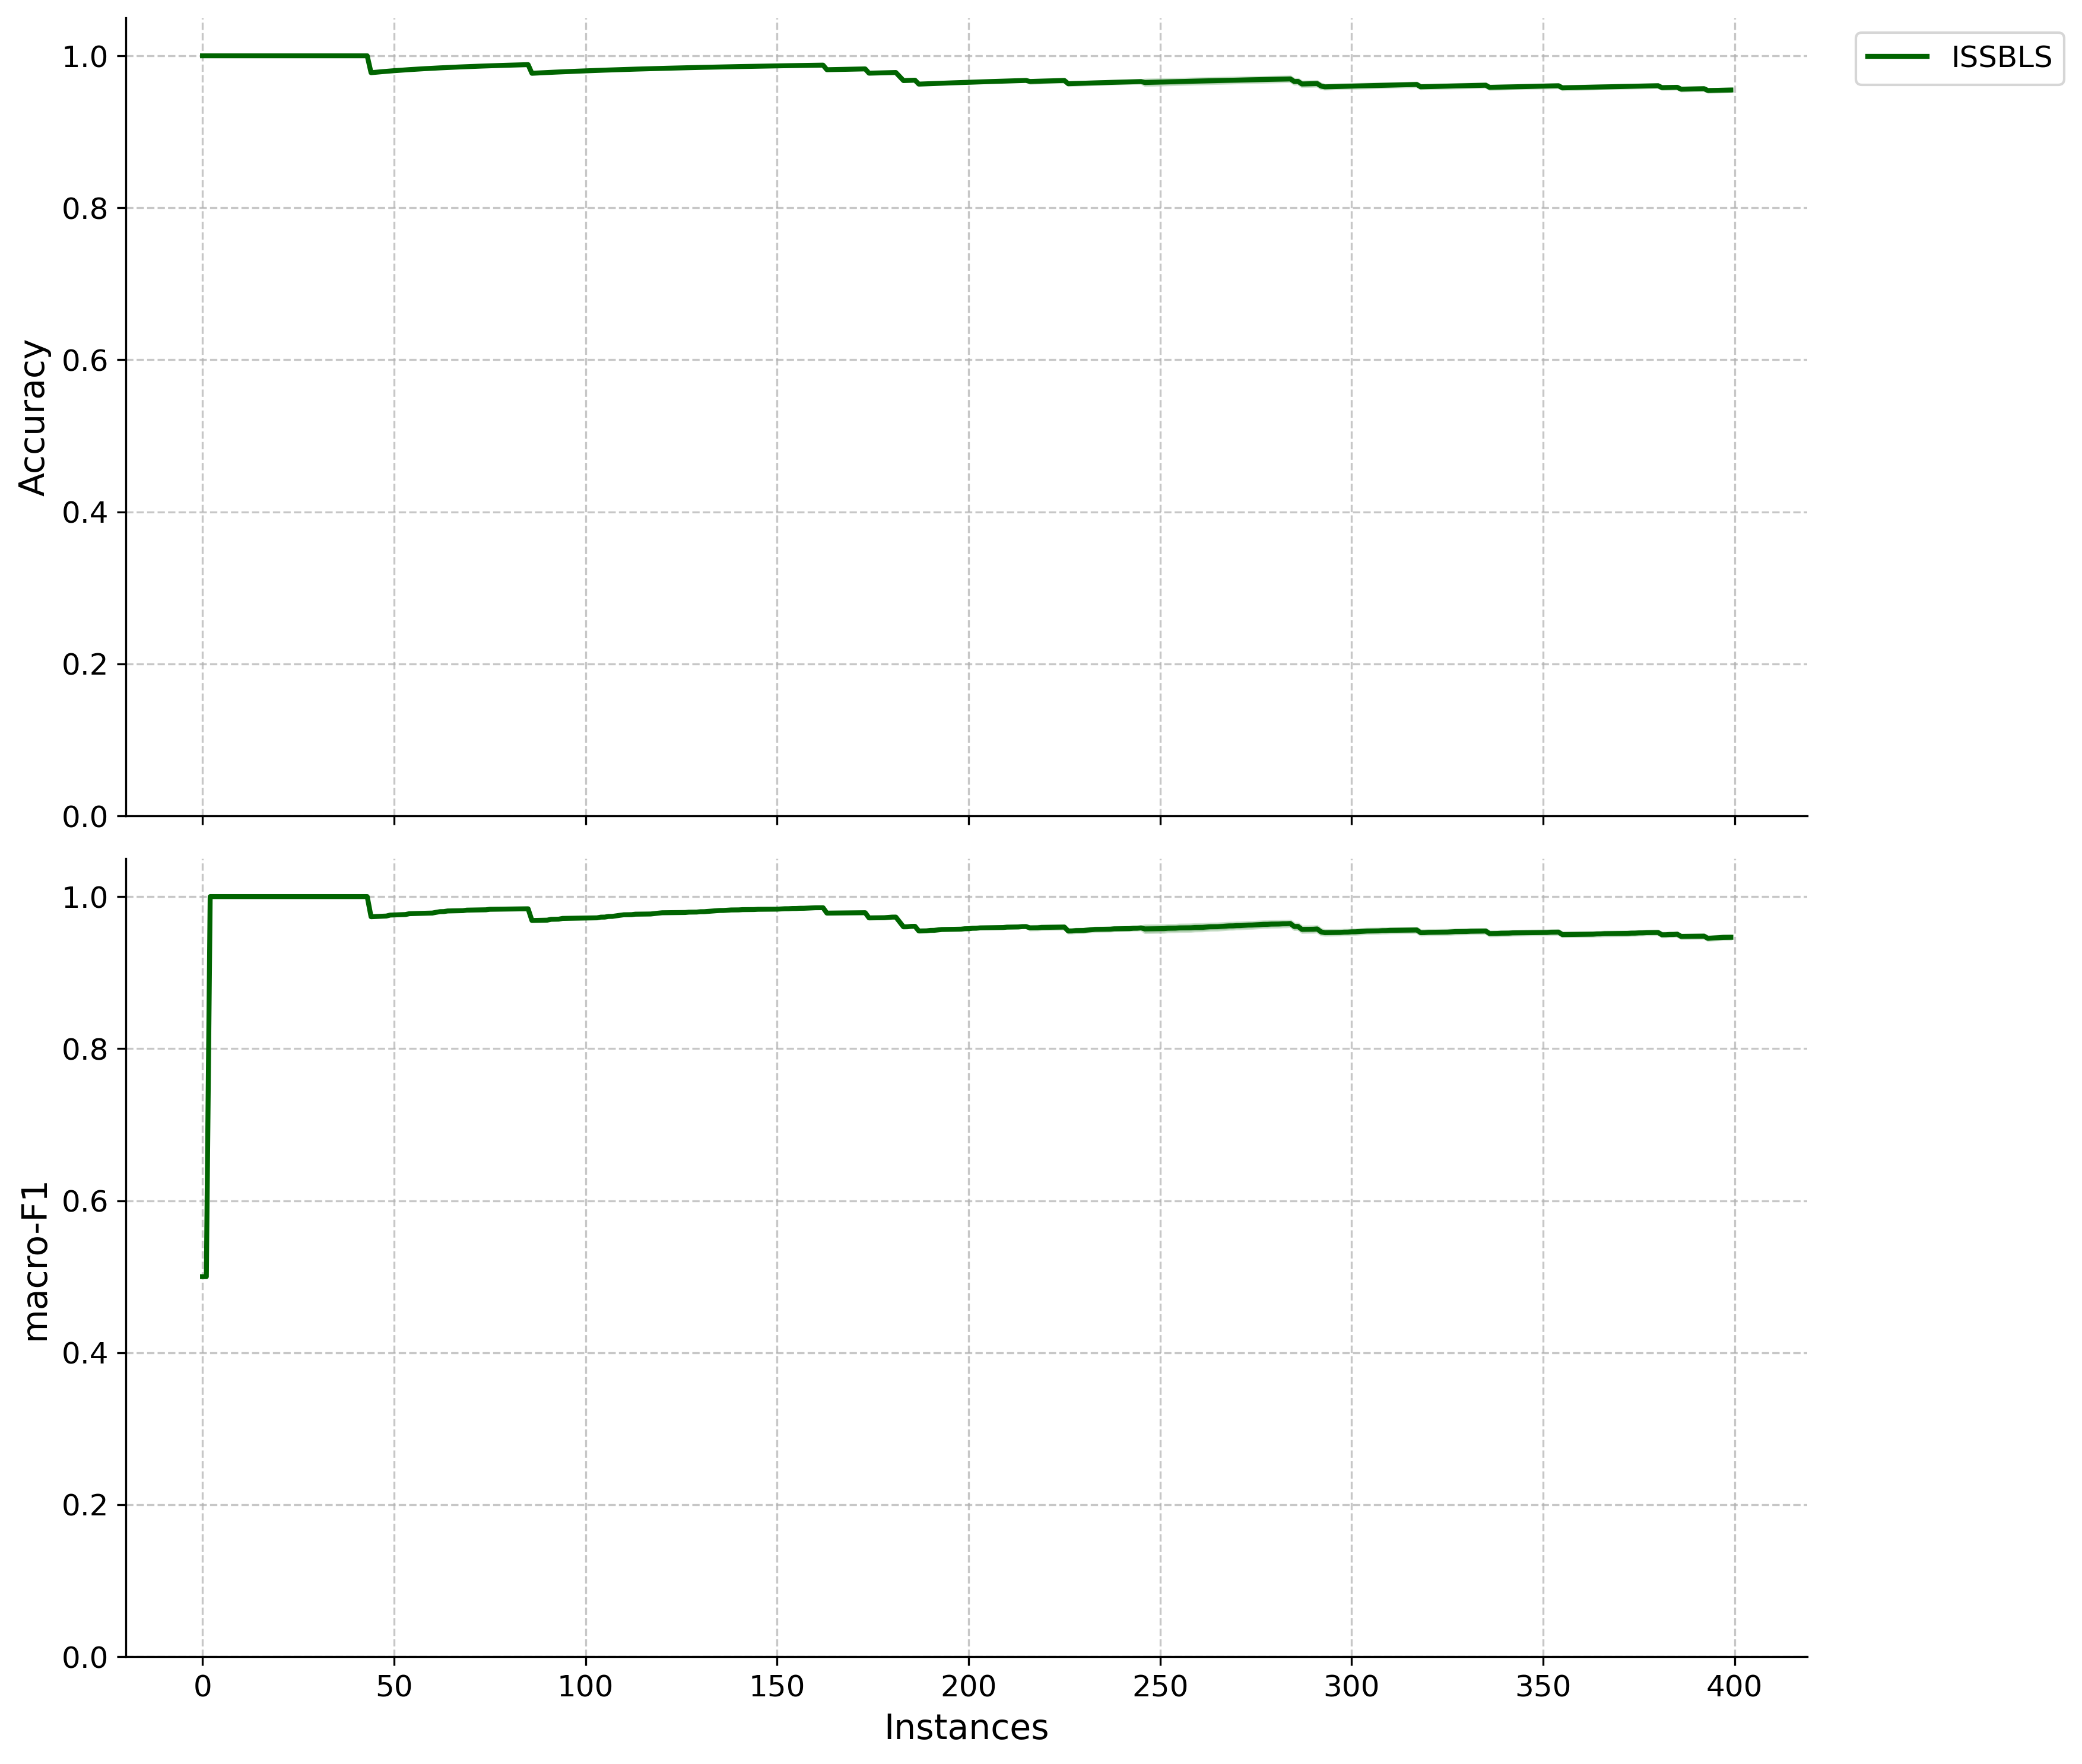


[ALL] Generating combined Accuracy + macro-F1 animation in subplots...


Generating GIF:   0%|          | 0/40 [00:00<?]


Saving GIF to: Results_combined_SEA_all_models.gif


Generating GIF: 100%|██████████| 40/40 [00:06<00:00]


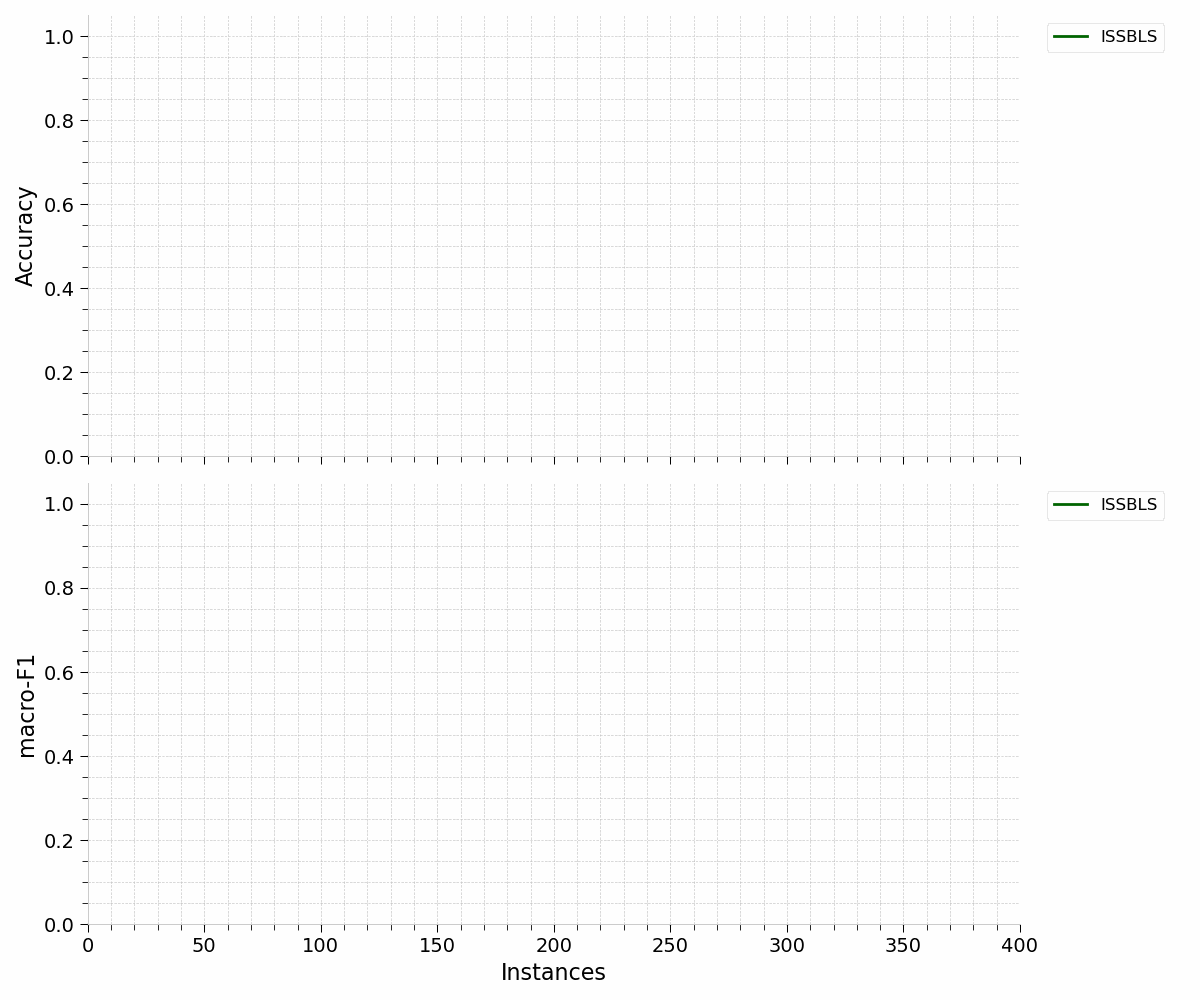

In [5]:
experiment.run()
if show_plot == 'Y':
    experiment.show(need_matrix=need_matrix)
logger.info("--------------------------------------------------------------------------------------------------")